<a href="https://colab.research.google.com/github/YashrajMishra6190/BankCustomerChurnModel/blob/main/BankCustomerChurnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

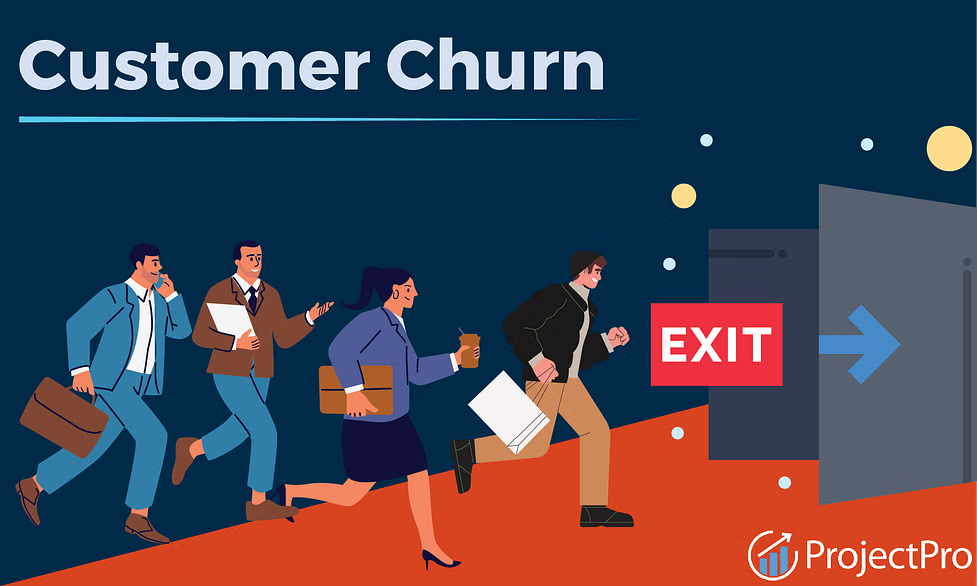

# **Bank Customer Churn Model**
----------
@YBI Foundation Internship


# Problem Statement

The propensity of consumers to leave a brand and cease being a paying customer of a specific company or organization is known as customer churn or customer attrition. A customer's churn rate is the proportion of consumers who stop using a business's goods or services within a given time frame. After one or more negative encounters, a consumer may decide to give up. Additionally, there would be significant cash losses and reputational harm if a sizable portion of dissatisfied customers left at a given period.

# Objective

The main goal of this research is to create a reliable churn prediction model that can recognize potential bank clients who are at risk of leaving the bank. In the end, banks may drastically lower customer churn rates and increase overall customer retention by developing an accurate churn prediction model.

# Data Source

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

The Data Link: https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv

# Importing Library




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
# https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv
# df : dataframe

df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- dataset: 10000 rows and 13 columns

In [3]:
df.shape

(10000, 13)

# Data Describe
---
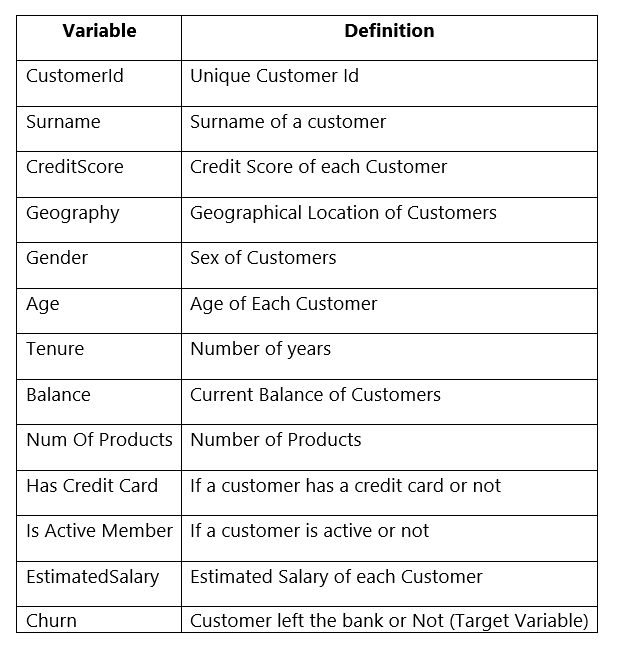

In [4]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing and Data Visualization

## Handling Duplicates

In [6]:
# There is no duplciated values
df.duplicated().sum()

0

In [7]:
"""
     CustomerID is the unique key for the table DataFrame
"""

df = df.set_index('CustomerId')

In [8]:
# inforamtion of the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB




## Data Encoding
---
Gender to int64 and Geography to int64 as of DType in the dataset.

<Axes: ylabel='Geography'>

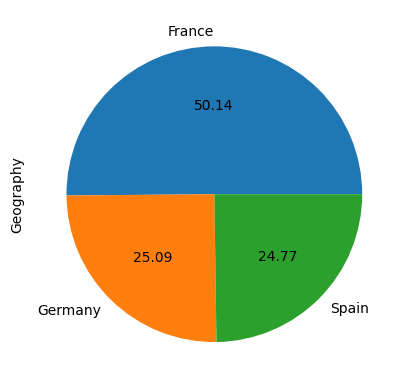

In [9]:
df['Geography'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [10]:
df.replace(
    {'Geography' : {'Spain':0, 'Germany':1, 'France':2}},
    inplace = True
)

<Axes: ylabel='Gender'>

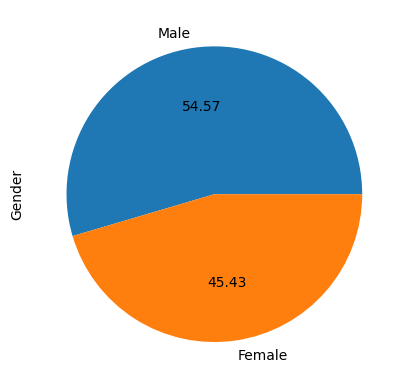

In [11]:
df['Gender'].value_counts().plot(kind = 'pie', autopct = "%.2f")

In [12]:
df.replace(
    {'Gender' : {'Male':0, 'Female':1}},
    inplace = True
)

<Axes: ylabel='Num Of Products'>

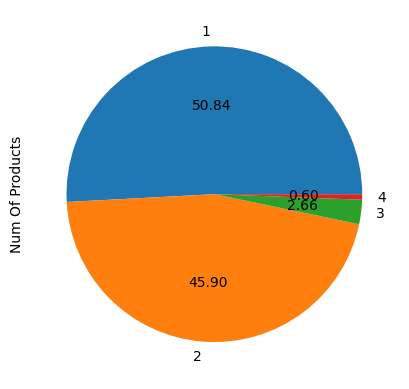

In [13]:
df['Num Of Products'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [14]:
df.replace(
    {'Num of Products' : {1:0, 2:1, 3:2, 4:3}},
    inplace = True
)

In [15]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

<Axes: ylabel='Is Active Member'>

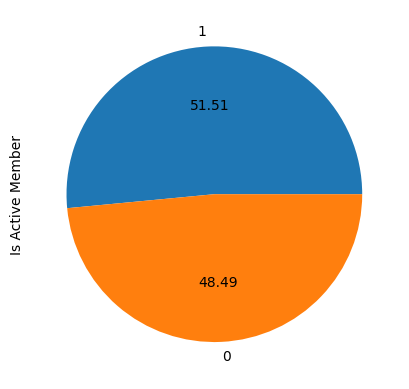

In [16]:
df['Is Active Member'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [17]:
# Check the customer with Churn with ZERO BALANCE
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [18]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: ylabel='Zero Balance'>

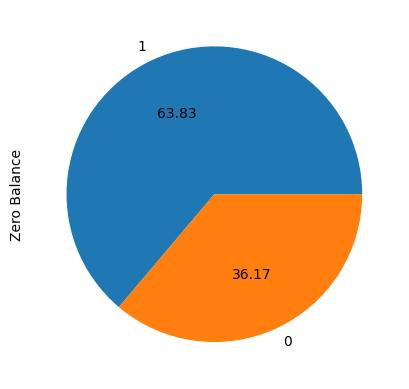

In [115]:
df['Zero Balance'].value_counts().plot(kind='pie', autopct = '%.2f')

In [20]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [21]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

# Define Target Variable (y) and Feature Variables (X)

In [22]:
# Surname only defines only the name and churn defines cutomer left or not
X = df.drop(['Surname','Churn'], axis = 1)
y = df['Churn']

In [26]:
#sampel size
X.shape, y.shape

((10000, 11), (10000,))

## Handling Imbalance Data
-------
Aim: ***Maximize Accuracy and reduce errors***

Problem: If the dataset is imbalance then in such cases, just by predicting the majority class we get a pretty high accurac, but fails to capture the minority class, which is most often the point of creating the model in the first place.

Solution Strategies: **Undersampling and Oversampling**

In [27]:
"""
Churn
People who had left :1
People who had not left: 0
"""
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

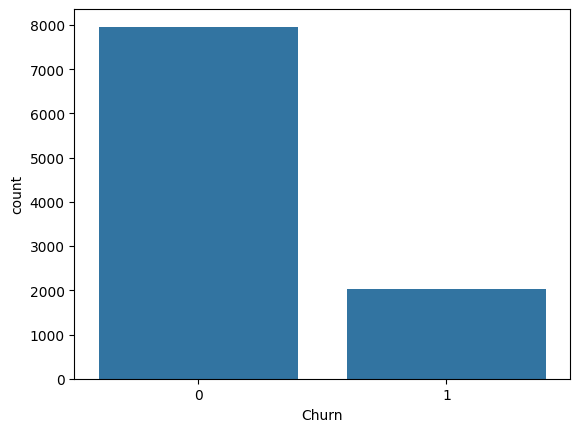

In [30]:
sns.countplot(data = df, x = 'Churn')

## Random Under Sampling


In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 2529)
X_rus, y_rus = rus.fit_resample(X,y)

In [33]:
#Size
X_rus.shape, X.shape

((4074, 11), (10000, 11))

In [34]:
y_rus.shape, y.shape

((4074,), (10000,))

- lost around 6000 rows from larger category to match with lowe category

In [35]:
#like
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [36]:
# and
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='Count'>

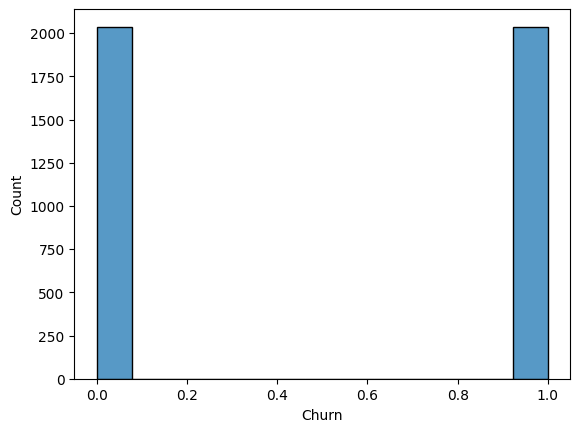

In [38]:
# Plotting values
sns.histplot(x = y_rus)

## Random Over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2529)
X_ros, y_ros = ros.fit_resample(X,y)

- gain 5000 rows from larger category to match lower category

In [41]:
X_ros.shape, X.shape

((15926, 11), (10000, 11))

In [42]:
y_ros.shape, y.shape

((15926,), (10000,))

In [45]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='Count'>

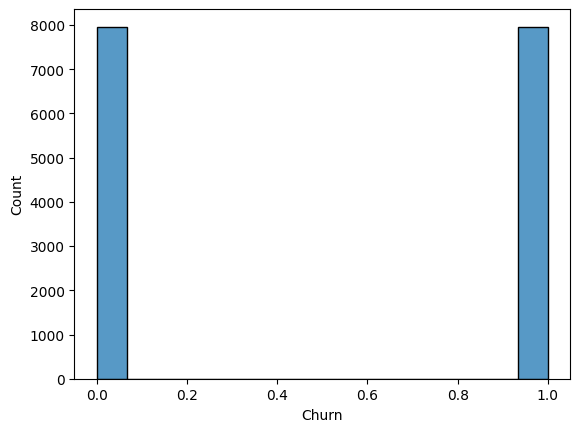

In [44]:
sns.histplot(x = y_ros)

# Train Test Split the DataSet

In [46]:
from sklearn.model_selection import train_test_split

## Split original data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

## Split Random Under Sample Data

In [48]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 25)

## Split Random Over Sample Data

In [49]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 25)

## Standardize Features

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

### Standardize Origianl Data

In [53]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

### Standardize Random Under Sample Data

In [54]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

### Standardize Random Over Sample Data

In [55]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# Modelling
---------
# **Support Vector Machine Classifier**

In [83]:
#import svc
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [84]:
#raw data
y_pred = svc.predict(X_test)

## Model Accuracy

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[2378,   41],
       [ 376,  205]])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2419
           1       0.83      0.35      0.50       581

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



- Here our accuracy is 86% but still the raw data model gives the error (recall is just 35%)

## Hyperparameter Tunning in Raw Model

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [1, 0.1, 0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']
}

In [88]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [90]:
grid_predictions = grid.predict(X_test)

In [91]:
confusion_matrix(y_test, grid_predictions)

array([[2203,  216],
       [ 362,  219]])

In [92]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2419
           1       0.50      0.38      0.43       581

    accuracy                           0.81      3000
   macro avg       0.68      0.64      0.66      3000
weighted avg       0.79      0.81      0.80      3000



# Model with Random Under Sampling

In [93]:
svc_rus = SVC()
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [94]:
y_pred_rus = svc_rus.predict(X_test_rus)

## Model Accuracy RUS

In [95]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[496, 107],
       [173, 447]])

In [96]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       603
           1       0.81      0.72      0.76       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



## Hyperparameter Tunning

In [97]:
param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [1, 0.1, 0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']
}

In [98]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [99]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [100]:
grid_predictions = grid.predict(X_test_rus)

In [101]:
confusion_matrix(y_test_rus, grid_predictions)

array([[477, 126],
       [155, 465]])

In [103]:
#Almost same
print(classification_report(y_test_rus, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       603
           1       0.79      0.75      0.77       620

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



# Model with Random Over Sampling

In [104]:
svc_ros = SVC()
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [105]:
y_pred_ros = svc_ros.predict(X_test_ros)

## Model Accuracy

In [108]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1944,  482],
       [ 527, 1825]])

In [109]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2426
           1       0.79      0.78      0.78      2352

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778



## Hyperparameter Tunning

In [110]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv=2)
grid.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  11.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [111]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [112]:
grid_predictions = grid.predict(X_test_ros)

In [113]:
confusion_matrix(y_test_ros, grid_predictions)

array([[2109,  317],
       [  85, 2267]])

# Best Fit Model

In [114]:
#Almost same
print(classification_report(y_test_ros, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2426
           1       0.88      0.96      0.92      2352

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Conclusion**
-----------
- It clearly shows that on comparing all the accuracy sets we got the best fit model Model with Ranom Over Sampling. On doing the Hyperparameters tunning the recall (96%) and precison (88%) for the `Churn` and overall `model accuracy` (92%) increases.

- rus and ros shows almost same Accuracy with minimum errors recall high as comapred to raw data model but after Tunning both rus (random under sampling) and ros (random over sampling) but ROS Model give the best fit model.



# **Code Explanation**
----------
Key Features includes:
`Import Library -> Import Dataset -> Data Source -> Data Describe -> Data Visualization -> Define Target Variable(y) and Feature Variables(x) -> Modelling -> Model Accuracy
 `

**Data Source:** It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not and the following dataset is provided by the @YBI Foundation.

**Data Describe:** It consists of the 10000 rows and 13 columns which are
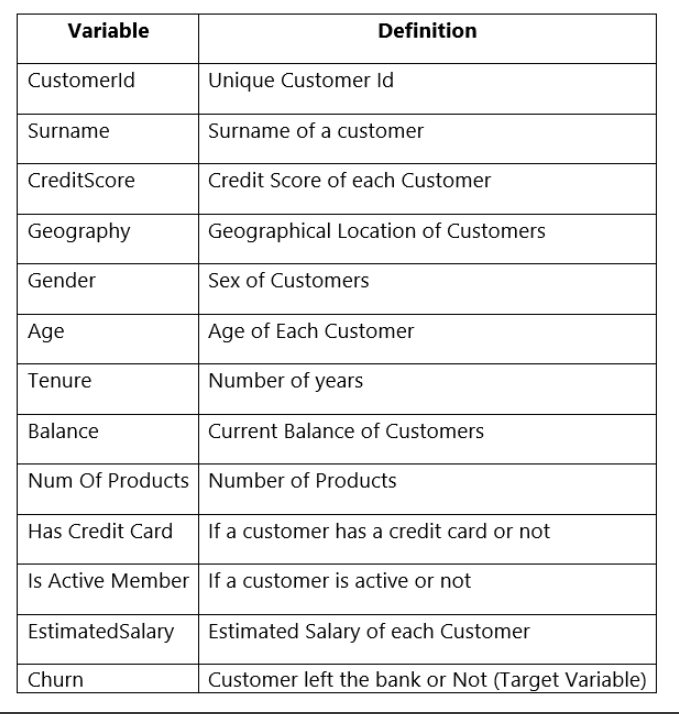